In [1]:
#Task 2
#Data Analysis on Sales Data
#data loading
import pandas as pd
df=pd.read_csv('sales_data.csv')
print(df.head(10))

  Product Region  Revenue  Profit  Discount     Category        Date
0       C   East   2892.0     NaN  0.117355  Electronics  2023-01-01
1       A  South   7894.0   107.0  0.415137    Furniture  2023-01-02
2       C   East   6405.0   500.0  0.106178     Clothing  2023-01-03
3       C  North   8996.0   200.0  0.477961    Furniture  2023-01-04
4       C   West   4555.0  2918.0  0.095972    Furniture  2023-01-05
5       C  South   8537.0  1430.0  0.097442  Electronics  2023-01-06
6       D   West   6860.0   893.0  0.264232    Furniture  2023-01-07
7       D   West   3097.0   825.0  0.486784     Clothing  2023-01-08
8       D  South      NaN  2627.0  0.365671    Furniture  2023-01-09
9       C  North   8768.0  2968.0  0.421250  Electronics  2023-01-10


In [2]:
#return the data type of each column
result=df.dtypes
print(result)

Product      object
Region       object
Revenue     float64
Profit      float64
Discount    float64
Category     object
Date         object
dtype: object


In [3]:
#.shape
#Understanding the dataset size
print(df.shape)

(100, 7)


In [4]:
#statistical summary of columns
print(df.describe())

           Revenue       Profit    Discount
count    99.000000    98.000000  100.000000
mean   5842.535354  1627.336735    0.252769
std    2413.837069   864.749138    0.137118
min    1468.000000   107.000000    0.003254
25%    3842.500000   885.500000    0.128637
50%    5505.000000  1676.500000    0.246227
75%    7953.000000  2362.500000    0.370578
max    9973.000000  2997.000000    0.496923


In [5]:
#check for duplicates
print(f" The number of duplicate rows are :{df.duplicated().sum()}")

 The number of duplicate rows are :0


In [6]:
#if duplicates present remove
df=df.drop_duplicates()
print("Removed Duplicates")
#checking for missing values
print("The Number of missing values in each column before cleaning is \n",df.isnull().sum())

Removed Duplicates
The Number of missing values in each column before cleaning is 
 Product     0
Region      0
Revenue     1
Profit      2
Discount    0
Category    0
Date        0
dtype: int64


In [7]:
 
# Replace missing values in numeric columns with the column mean
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Print number of missing values per column after cleaning
print("The number of missing values in each column after cleaning is:\n", df.isnull().sum())


The number of missing values in each column after cleaning is:
 Product     0
Region      0
Revenue     0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


In [8]:
#covert date column to date and time format
import pandas as pd
df['Date']=pd.to_datetime(df['Date'])
#verifying the data cleaning
display(df.head())

,Product,Region,Revenue,Profit,Discount,Category,Date
0,C,East,2892.0,1627.336735,0.117355,Electronics,2023-01-01
1,A,South,7894.0,107.000000,0.415137,Furniture,2023-01-02
2,C,East,6405.0,500.000000,0.106178,Clothing,2023-01-03
3,C,North,8996.0,200.000000,0.477961,Furniture,2023-01-04
4,C,West,4555.0,2918.000000,0.095972,Furniture,2023-01-05


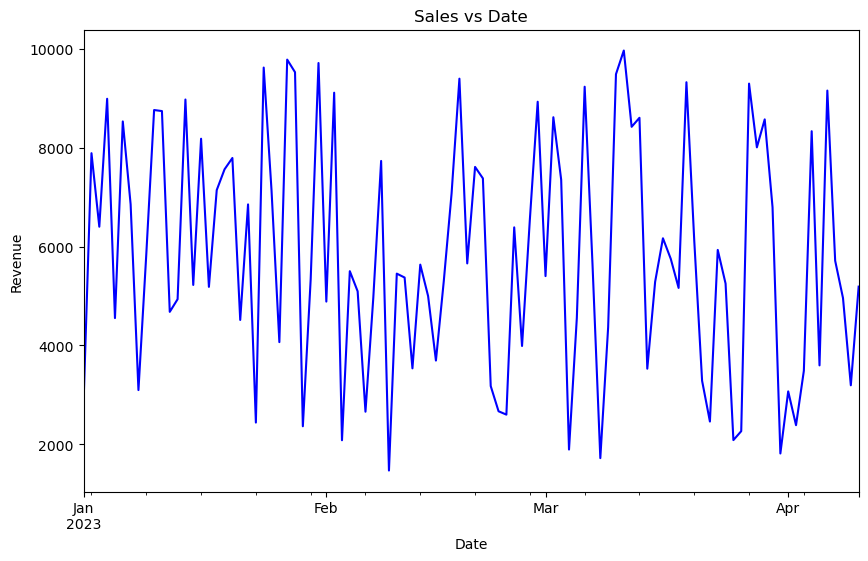

In [9]:
#visualizing Revenue vs date
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df.groupby('Date')['Revenue'].sum().plot(kind="line",color="blue")
plt.title("Sales vs Date")
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()


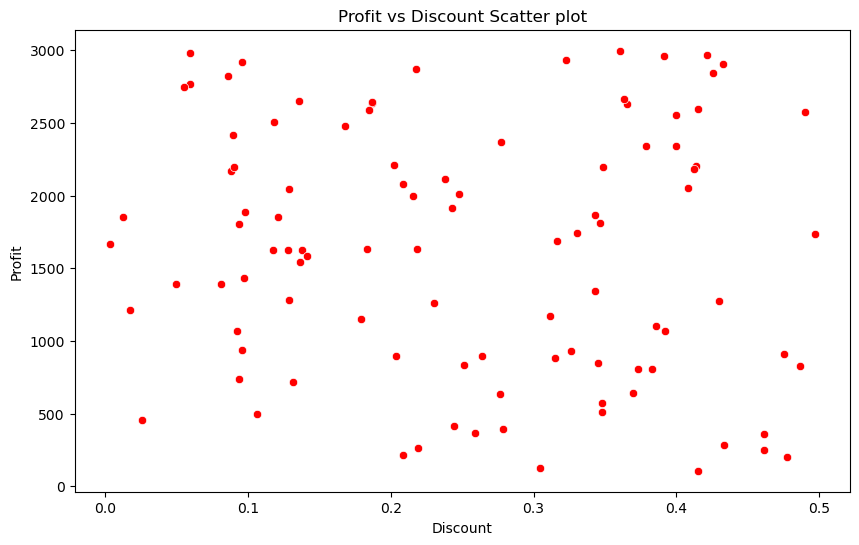

In [10]:
import seaborn as sns 
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="Discount",y="Profit",color="red")
plt.title("Profit vs Discount Scatter plot")
plt.show()

Text(0, 0.5, 'Profit')

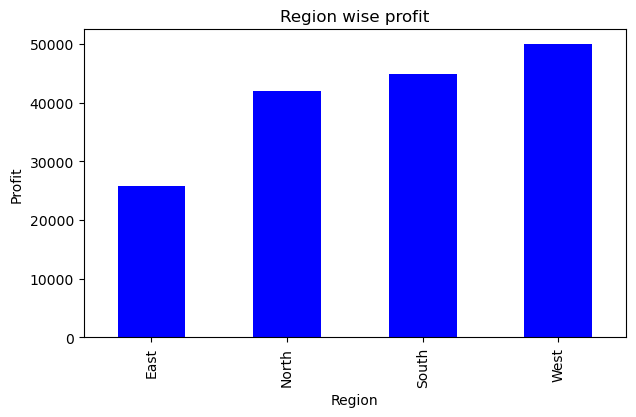

In [11]:
#Region wise profit
plt.figure(figsize=(7,4))
df.groupby("Region")["Profit"].sum().plot(kind="bar",color="blue")
plt.title("Region wise profit")
plt.xlabel("Region")
plt.ylabel("Profit")

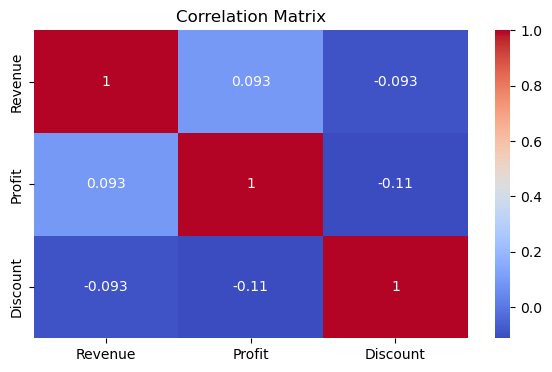

In [12]:
#Heatmap for correlations
plt.figure(figsize=(7,4))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [13]:
# Train a Linear Regression Model to predict Revenue using Profit and Discount as features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

#select features and target
X=df[['Profit','Discount']]
Y=df['Revenue']
#split the dataset into training and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=43)
#train the linear Regression Model
model=LinearRegression()
model.fit(X_train,Y_train)
#Model Presictions
Y_pred=model.predict(X_test)
#Evaluate the model
print(f" The mean squared error is: {mean_squared_error(Y_test,Y_pred):.2f}")
print(f"The r2 score is {r2_score(Y_test,Y_pred):.2f}")





 The mean squared error is: 7534720.97
The r2 score is 0.00
